# Code to generate the synthetic data for Coupled PHUs.

/Users/sudhipv/documents/coupledode/codes/phudata
/Users/sudhipv/documents/coupledode/codes/phudata
shape of M is (4, 2, 2, 2720)
/Users/sudhipv/documents/coupledode/codes/mobility_tensor/stochastic_Tor_Durham
(52, 2, 2)
m range is 39
sw is 0
length of tsw is 61
61
62
63
64
65
66
67
68
69
sw is 7
length of tsw is 61
131
132
133
134
135
136
137
138
139
sw is 14
length of tsw is 61
201
202
203
204
205
206
207
208
209
sw is 21
length of tsw is 61
271
272
273
274
275
276
277
278
279
sw is 28
length of tsw is 61
341
342
343
344
345
346
347
348
349
sw is 35
length of tsw is 61
411
412
413
414
415
416
417
418
419
sw is 42
length of tsw is 61
481
482
483
484
485
486
487
488
489
sw is 49
length of tsw is 61
551
552
553
554
555
556
557
558
559
sw is 56
length of tsw is 61
621
622
623
624
625
626
627
628
629
sw is 63
length of tsw is 61
691
692
693
694
695
696
697
698
699
sw is 70
length of tsw is 61
761
762
763
764
765
766
767
768
769
sw is 77
length of tsw is 61
831
832
833
834
835
836
837
838


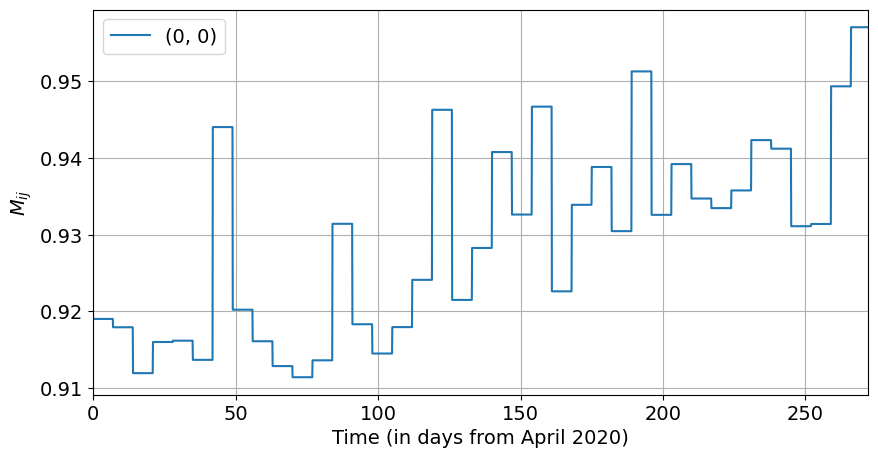

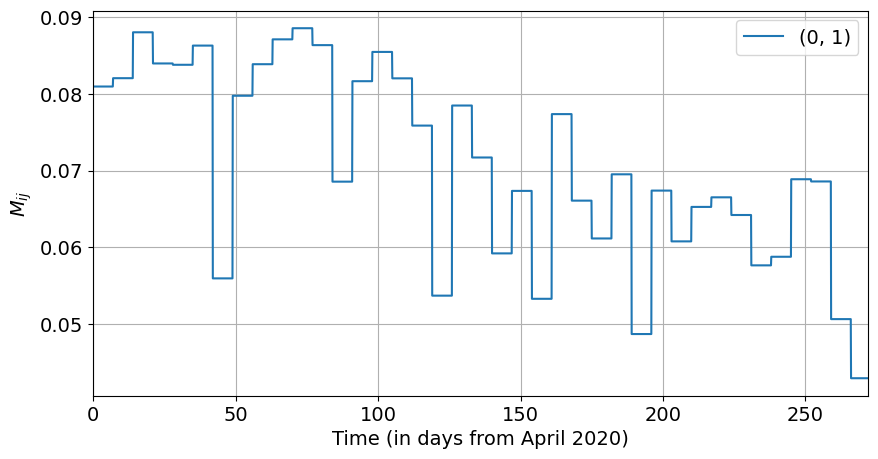

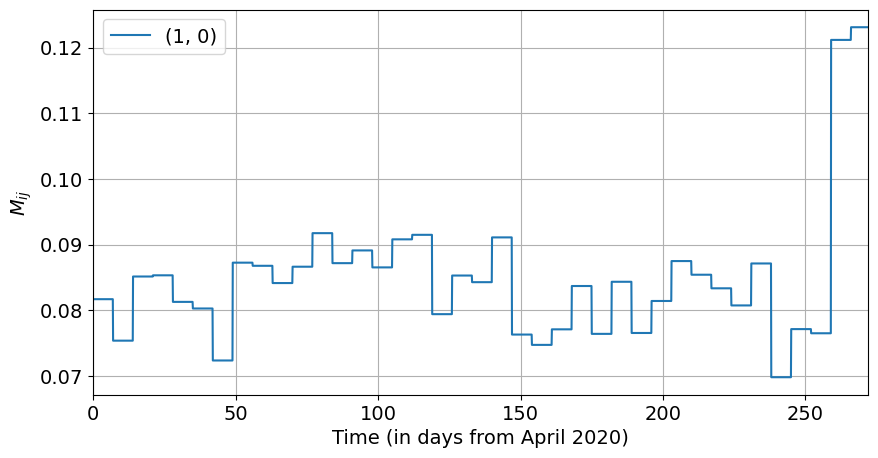

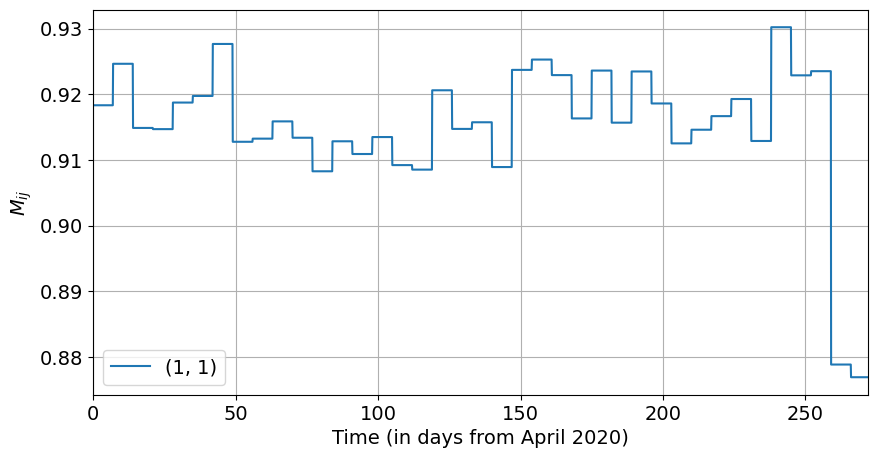

initial infected in PHU1 430.0
total population in PHU1 2794356.0
initial infected in PHU2  94.0
total population in PHU2  696992.0


In [1]:

import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys


dt = 0.1
tstart = 0
tlim = 272
t = np.arange(tstart, tlim, 1)

tmoh = np.arange(tstart, tlim, dt)

ndiv = 1/dt


os.chdir('/Users/sudhipv/documents/coupledode/codes/phudata/')
print(os.getcwd())

Data = np.zeros([365,4])
current_directory = os.getcwd()
print(current_directory)

directory_path = current_directory
files = os.listdir(directory_path)

target_file1 = '30-Toronto.csv'
target_file2 = '34-York.csv'
target_file3 = '04-Durham.csv'
target_file4 = '22-PeelRegion.csv'

Data[:,0] = np.genfromtxt(target_file1, delimiter=',')
Data[:,1] = np.genfromtxt(target_file2, delimiter=',')
Data[:,2] = np.genfromtxt(target_file3, delimiter=',')
Data[:,3] = np.genfromtxt(target_file4, delimiter=',')


population_by_phu = np.genfromtxt('population_by_phu.csv', delimiter=',')


N_city = 2
# Preallocate compartments
S = np.zeros((len(tmoh),N_city))
E = np.zeros((len(tmoh),N_city))
I = np.zeros((len(tmoh),N_city))
R = np.zeros((len(tmoh),N_city))
D = np.zeros((len(tmoh),N_city))
N = np.zeros((len(tmoh),N_city))


I_model = np.zeros((len(t),N_city))
I_synthetic = np.zeros((len(t),N_city))


# Stratification Tensor M
M = np.zeros((4,N_city,N_city,len(tmoh)))

print("shape of M is", np.shape(M))



#####################################################################################


#  Below part of code is not well written - It uses the weekly data to generate the daily values 
# of mobility tensor and further saves in each time step. 

# Load the Mobility tensor values based on the Flow matrix

# Week number 13 (starting from 0) is April 6th.
# Week number 37 is Sep 21st.

os.chdir('/Users/sudhipv/documents/coupledode/codes/mobility_tensor/stochastic_Tor_Durham')
Mtensor = np.zeros([52,2,2])
current_directory = os.getcwd()
print(current_directory)

directory_path = current_directory
filesmobility = os.listdir(directory_path)

# print(files)

for ii in range(52):
    
      target_name_part = "Stochastic_matrix"+str(ii)+".dat"
    
      for file in filesmobility:
            if target_name_part == file:
              target_file = file
    #           print(target_name_part)
    #           print(target_file)
              break
      else:
        raise FileNotFoundError(f"Could not find any file containing '{target_name_part}'.")

      Mtensor[ii,:,:] = np.genfromtxt(target_file, delimiter=' ')
#       print('data collected from ',target_file)


print(np.shape(Mtensor))


mrange = int((tlim-tstart)/7) + 1

print("m range is",mrange)


for w in range(mrange): # 39
   
    sw = 7*w
    print("sw is", sw)
    
    if(w != mrange-1):
        tsw = np.linspace(sw, sw+6, int((1/dt)*6+1))
    else:
        tsw = np.linspace(sw, sw+5, int((1/dt)*5+1))

    
    print("length of tsw is", len(tsw))
    for swk in range(len(tsw)):
        mindex = int((1/dt) * sw + swk)
        # print("mindex is", mindex)
        M[0,:,:,mindex] = Mtensor[13+w,0:N_city,0:N_city]
        M[1,:,:,mindex] = Mtensor[13+w,0:N_city,0:N_city]
        M[2,:,:,mindex] = Mtensor[13+w,0:N_city,0:N_city]
        M[3,:,:,mindex] = Mtensor[13+w,0:N_city,0:N_city]
        

    tsw2 = np.linspace(sw+6+dt, sw+7, int((1/dt)*1))
    # print("tsw2 is", tsw2) 
    for swk2 in range(1,len(tsw2)):
        mindex2 = mindex + swk2
        print(mindex2)
        M[0,:,:,mindex2] = Mtensor[13+w,0:N_city,0:N_city]
        M[1,:,:,mindex2] = Mtensor[13+w,0:N_city,0:N_city]
        M[2,:,:,mindex2] = Mtensor[13+w,0:N_city,0:N_city]
        M[3,:,:,mindex2] = Mtensor[13+w,0:N_city,0:N_city]




### TEST CODE
mpl.rcParams.update({'font.size':14})
for i in range(N_city):
    for j in range(N_city):
        plt.figure(i+j,figsize=(10,5))
        plt.plot(tmoh, M[0,i,j,:], label=f'{i,j}')
        plt.legend(loc='best')
        plt.xlabel('Time (in days from April 2020)')
        plt.xlim([0,tlim])
        plt.ylabel('$M_{ij}$')
        plt.grid()
        plt.show()


       
# sys.exit()
#####################################################################################

#####Force of infection , Lambda
L_Force = np.zeros((len(tmoh),N_city))


###### CHANGE HERE ###########
total = np.zeros((N_city))


total[0] = population_by_phu[29,1]

total[1] = population_by_phu[3,1]


# total[2] = population_by_phu[33,1]

# total[3] = population_by_phu[21,1]

# print(total)
# Initial Conditions
 
###### CHANGE HERE ###########

E[0,0] = Data[0,0]
I[0,0] = Data[0,0]
R[0,0] = 0
D[0,0] = 0
N[0,0] = total[0]
S[0,0] = N[0,0] - E[0,0] - I[0,0] - R[0,0] - D[0,0]



E[0,1] = Data[0,2]
I[0,1] = Data[0,2]
R[0,1] = 0
D[0,1] = 0
N[0,1] = total[1]
S[0,1] = N[0,1] - E[0,1] - I[0,1] - R[0,1] - D[0,1]


I_model[0,0] = I[0,0]
I_model[0,1] = I[0,1]


I_synthetic[0,0] = I[0,0]
I_synthetic[0,1] = I[0,1]




# Model parameters - Taken from Southern Ontario - COVID MBE paper
gamma_e = 1/15
gamma_i = 1/5
gamma_r = 1/11
gamma_d = 1/750

beta_e = np.zeros((len(tmoh),N_city)) 
beta_i = np.zeros((len(tmoh),N_city))

beta_calibrated = np.zeros((len(tmoh),N_city))


print("initial infected in PHU1",I[0,0])

print("total population in PHU1",total[0])

print("initial infected in PHU2 ",I[0,1])

print("total population in PHU2 ",total[1])


#### PEEL - 234 , 1451022

#### Toronto - 430 , 2794356

### York - 212, 1173334

### Durham - 94   - 696992



# Manually Calibrated Beta values for each PHU

In [4]:

M[:,0,0,:] = 1
M[:,0,1,:] = 0


M[:,1,0,:] = 0
M[:,1,1,:] = 1


# M[2,0,0,:] = 1
# M[2,0,1,:] = 0

# M[2,1,0,:] = 0
# M[2,1,1,:] = 1





############ USED FOR GENERATING DATA #########

### Creating an artificial mobility tensor 

# M[:,0,0,:] = 1
# M[:,0,1,:] = 0

# M[:,1,0,:] = 0
# M[:,1,1,:] = 1

# M[2,0,0,:] = 1
# M[2,0,1,:] = 0


# M[2,1,0,:] = 0
# M[2,1,1,:] = 1


###############################################


# original    
a0 =   0.15
a1 =  -0.1
t1 =  20
a2 =   0.05
t2 =  35
a3 =   -0.07
t3 = 60
a4 =  0.035
t4 = 80
a5 =  0.08
t5 = 140
a6 =  -0.065
t6 = 180
a7 =  0.025
t7 = 190
a8 =  -0.015
t8 = 230  

beta_i[:,0] = a0  + a1/(1 + np.exp((t1-tmoh))) +  a2/(1 + np.exp((t2-tmoh))) + a3/(1 + np.exp((t3-tmoh))) + a4/(1 + np.exp((t4-tmoh))) + a5/(1 + np.exp((t5-tmoh)))  + a6/(1 + np.exp((t6-tmoh))) + a7/(1 + np.exp((t7-tmoh))) + a8/(1 + np.exp((t8-tmoh)))
beta_e[:,0] = beta_i[:,0]

################### Durham ##########################################################

# Original

a0 =   0.14
a1 =  -0.115
t1 =  20
a2 =   0.06
t2 =  35
a3 =   -0.05
t3 = 65
a4 =  0.035
t4 = 90
a5 =  0.06
t5 = 140
a6 =  -0.075
t6 = 180
a7 =  0.06
t7 = 190
a8 =  -0.025
t8 = 250


beta_i[:,1] = a0  + a1/(1 + np.exp((t1-tmoh))) +  a2/(1 + np.exp((t2-tmoh))) + a3/(1 + np.exp((t3-tmoh))) + a4/(1 + np.exp((t4-tmoh))) + a5/(1 + np.exp((t5-tmoh)))  + a6/(1 + np.exp((t6-tmoh))) + a7/(1 + np.exp((t7-tmoh))) + a8/(1 + np.exp((t8-tmoh)))
beta_e[:,1] = beta_i[:,1]



################### York ##########################################################

# Original
# a0 =   0.12
# a1 =  -0.1
# t1 =  20
# a2 =   0.08
# t2 =  35
# a3 =   -0.04
# t3 = 50
# a4 =  0.07
# t4 = 130
# a5 = -0.04
# t5 = 200
# a6 = 0.0
# t6 = 250




# beta_i[:,2] = a0  + a1/(1 + np.exp((t1-tmoh))) +  a2/(1 + np.exp((t2-tmoh))) + a3/(1 + np.exp((t3-tmoh))) + a4/(1 + np.exp((t4-tmoh))) + a5/(1 + np.exp((t5-tmoh)))  + a6/(1 + np.exp((t6-tmoh)))
# beta_e[:,2] = beta_i[:,2]



################### Peel ##########################################################

# original
# a0 =   0.15
# a1 =  -0.1
# t1 =  20
# a2 =   0.05
# t2 =  35
# a3 =   -0.07
# t3 = 60
# a4 =  0.035
# t4 = 80
# a5 =  0.08
# t5 = 140
# a6 =  -0.09
# t6 = 180
# a7 =  0.065
# t7 = 190
# a8 =  -0.035
# t8 = 235


# beta_i[:,3] = a0  + a1/(1 + np.exp((t1-tmoh))) +  a2/(1 + np.exp((t2-tmoh))) + a3/(1 + np.exp((t3-tmoh))) + a4/(1 + np.exp((t4-tmoh))) + a5/(1 + np.exp((t5-tmoh)))  + a6/(1 + np.exp((t6-tmoh))) + a7/(1 + np.exp((t7-tmoh))) + a8/(1 + np.exp((t8-tmoh)))
# beta_e[:,3] = beta_i[:,3]


In [5]:


### CHANGE HERE #######


mu = np.zeros((N_city))

sigma = np.zeros((N_city))


mu[:]= 0 # mean 
# Toronto
sigma[0]= 75 # standard deviation
# Durham
sigma[1] = 20 # standard deviation

# york
# sigma[2]= 20 # standard deviation

# # Peel
# sigma[3] = 40 # standard deviation

# Set seed for reproducibility
# np.random.seed(50)

e_data = np.zeros((len(t),N_city))

e_data[:,0] = np.random.normal(mu[0], sigma[0],len(t))

e_data[:,1] = np.random.normal(mu[1], sigma[1],len(t))

###########################################


print(mu)
print(sigma)


#### With mobility tensor   

for kk in range(1,len(tmoh)):

    for gg in range(0,N_city):

        L_sum = 0
        for ll in range(0,N_city):

            Nlm = 0
            L_cityinf = 0
            
            for mm in range(0,N_city):
                Nlm =  Nlm + M[0,mm,ll,kk-1] * S[kk-1,mm] +  M[1,mm,ll,kk-1] * E[kk-1,mm] + M[2,mm,ll,kk-1] * I[kk-1,mm] + M[3,mm,ll,kk-1] * R[kk-1,mm]

                ## Original
                # L_cityinf = L_cityinf + (beta_e[kk-1,mm] * M[1,mm,ll,kk-1] * E[kk-1,mm] + beta_i[kk-1,mm] * M[2,mm,ll,kk-1] * I[kk-1,mm])

                ## beta changed
                L_cityinf = L_cityinf + (beta_e[kk-1,ll] * M[1,mm,ll,kk-1] * E[kk-1,mm] + beta_i[kk-1,ll] * M[2,mm,ll,kk-1] * I[kk-1,mm])


            L_sum = L_sum + (M[0,gg,ll,kk-1] * L_cityinf)/Nlm


        L_Force[kk-1,gg] = L_sum


        S[kk,gg] = S[kk-1,gg] - dt*(L_Force[kk-1,gg]*S[kk-1,gg])
        E[kk,gg] = E[kk-1,gg] + dt*(L_Force[kk-1,gg]*S[kk-1,gg] - (gamma_i + gamma_e)*E[kk-1,gg])
        I[kk,gg] = I[kk-1,gg] + dt*(gamma_i*E[kk-1,gg] - (gamma_r + gamma_d)*I[kk-1,gg])
        R[kk,gg] = R[kk-1,gg] + dt*(gamma_e*E[kk-1,gg] + gamma_r*I[kk-1,gg])
        D[kk,gg] = D[kk-1,gg] + dt*(gamma_d*I[kk-1,gg])
        N[kk,gg] = S[kk,gg] +  E[kk,gg] + I[kk,gg] + R[kk,gg]


        ## For collecting the model output only at data points
        if( kk%ndiv == 0 ):
        # if( kk%10 == 0 and kk > 79/dt):
            # print("kk is", kk)
            idxmoh = int(kk/ndiv)
            # print("idxmoh is", idxmoh)
            # print(I[kk,gg])
            I_model[idxmoh,gg] = I[kk,gg]
            I_synthetic[idxmoh,gg] = I[kk,gg]

        

# print("I model", I_model)

print("added noise for PHU 1 ", e_data[:,0])


print("added noise for PHU 2 ", e_data[:,1])


# print("noise squared ", e_data**2)


print("i synthetic before noise", I_synthetic[:,0])

I_synthetic[:,0] = I_synthetic[:,0] + e_data[:,0]

I_synthetic[:,1] = I_synthetic[:,1] + e_data[:,1]

print("i synthetic after noise", I_synthetic[:,0])




[0. 0.]
[75. 20.]
added noise for PHU 1  [-1.58415867e+02  8.36884233e+01 -9.77330818e+01  1.53893171e+00
 -1.84577653e+02  6.10269876e+01  2.69193171e+01  2.54008209e+01
  2.32634701e+01  5.94204083e+00  6.83206318e+01  1.83163924e+01
 -9.13094405e+01 -4.67796844e+01 -4.59658243e+01 -5.18651406e+01
 -1.33640360e+02  8.19054811e+01  8.46202748e+01 -4.05279560e+00
 -4.20119480e+01 -4.08303253e+01 -1.36636617e+02 -1.85361071e+01
 -1.76052562e+01 -1.10663644e+01 -8.84622514e-02  5.98853511e+01
  6.73474193e+01 -9.81919170e+00  1.82800569e+00  5.94696341e+01
 -6.60324051e+01 -7.93512534e+01 -9.80136592e+01 -1.09376775e+01
  1.01044850e+02  6.45339268e+01 -9.60519904e+01  1.14915294e+02
  7.07936536e+00 -1.51283684e+02 -8.21376050e+01 -1.50335549e+02
 -6.56354213e+01 -6.94022030e+01  8.76813004e+01  7.25685782e+00
  1.03168888e+02 -7.61037762e+01  1.35903073e+02 -3.45697317e+01
 -3.85475928e+01  1.05043295e+01 -7.45944657e+00 -8.05415313e+01
 -2.87583389e+01  7.51570467e+01  5.39633388e+01 

In [ ]:

# os.chdir('/Users/sudhipv/documents/coupledode/codes/Inference/MLE/coupledPHU/synthetic/') 

np.savetxt('/Users/sudhipv/documents/plos_coupledode/codes/data/toronto_independent_75.csv', I_synthetic[:,0], delimiter=",")

np.savetxt('/Users/sudhipv/documents/plos_coupledode/codes/data/durham_independent_20.csv', I_synthetic[:,1], delimiter=",")


os.getcwd()


path = '/Users/sudhipv/documents/plos_coupledode/codes/figs'



filepath =  os.path.join(path,'toronto_synthetic_data.pdf')

plt.figure(figsize=(10,5))
plt.title('Toronto')
plt.plot(t, Data[tstart:tlim,0], 'o', label='MOH')
plt.plot(t, I_synthetic[:,0], '*', markersize=6, label='$I$ + $\mathcal{N}$(0,' + f'{sigma[0]}' + ')')
plt.plot(tmoh, I[:,0], '-',linewidth=2, label='Model output')
plt.plot(tmoh, I[:,0] + 3*sigma[0], '-',linewidth=2, label='$I$ + $3\sigma$', color='0.7')
plt.plot(tmoh, I[:,0] - 3*sigma[0], '-',linewidth=2, label='$I$ - $3\sigma$', color='0.7')
# plt.plot(t, I_synthetic, '*', markersize=6, label='$I$ + $\mathcal{N}$(0,250) : Toronto')
plt.legend(loc='best')
plt.xlabel('Time (days)')
plt.xlim([0,tlim])
plt.ylabel('Infected cases')
plt.grid()
plt.savefig(filepath)
plt.show()

filepath =  os.path.join(path,'durham_synthetic_data.pdf')

plt.figure(figsize=(10,5))
plt.title('Durham')
plt.plot(t, Data[tstart:tlim,2], 'o', label='MOH')
plt.plot(t, I_synthetic[:,1], '*', markersize=6, label='$I$ + $\mathcal{N}$(0,' + f'{sigma[1]}' + ')')
plt.plot(tmoh, I[:,1], '-',linewidth=2, label='Model output')
plt.plot(tmoh, I[:,1] + 3*sigma[1], '-',linewidth=2, label='$I$ + $3\sigma$', color='0.7')
plt.plot(tmoh, I[:,1] - 3*sigma[1], '-',linewidth=2, label='$I$ - $3\sigma$', color='0.7')
# plt.plot(t, I_synthetic, '*', markersize=6, label='$I$ + $\mathcal{N}$(0,250) : Toronto')
plt.legend(loc='best')
plt.xlabel('Time (days)')
plt.xlim([0,tlim])
plt.ylabel('Infected cases')
plt.grid()
plt.savefig(filepath)
plt.show()





## Retrieving the data 

In [ ]:



I_retrived = np.zeros((len(t),N_city))

# target_file1 = './toronto_synthetic_data_75.csv'

# target_file1 = './fulldata_two/toronto_2phu_full_40.csv'

# target_file2 = './fulldata_two/durham_2phu_full_65.csv'

target_file1 = './toronto_2phu_diagonal_test.csv'

target_file2 = './durham_2phu_diagonal_test.csv'


I_retrived[:,0] = np.genfromtxt(target_file1, delimiter=',')

I_retrived[:,1] = np.genfromtxt(target_file2, delimiter=',')


print(np.shape(I_retrived))
#### REPLOT THE DATA TO ONLY 90 DAYS###



In [ ]:
tstart = 0
tlim = 272
t = np.arange(tstart, tlim, 1)

tmoh = np.arange(tstart, tlim, dt)


path = '/Users/sudhipv/documents/coupledode/codes/Inference/MLE/coupledPHU/synthetic/figs'



filepath =  os.path.join(path,'toronto_2phu_diagonal_test.pdf')


plt.plot(t, Data[tstart:tlim,0], 'o', label='MOH : Toronto')
plt.plot(t, I_model[tstart:tlim,0], '-',linewidth=2, label='Manual: Toronto')
plt.plot(t, I_retrived[tstart:tlim,0], '*', markersize=6, label='$I$ + $\mathcal{N}$(0,50) : Toronto')
# plt.plot(t, I_synthetic, '*', markersize=6, label='$I$ + $\mathcal{N}$(0,250) : Toronto')

# plt.plot(t, I_model[tstart:tlim,0]+ 3*sigma, '-',linewidth=2, label='$I$ + $3\sigma$', color='0.7')

# plt.plot(t, I_model[tstart:tlim,0]-3*sigma, '-',linewidth=2, label='$I$ - $3\sigma$', color='0.7')


plt.legend(loc='best')
plt.xlabel('Time (days)')
plt.xlim([0,tlim])
plt.ylabel('Population')
plt.grid()
plt.savefig(filepath)
plt.show()

filepath =  os.path.join(path,'toronto_2phu_diagonal_test.pdf')

plt.plot(t, Data[tstart:tlim,2], 'o', label='MOH : Durham')
plt.plot(t, I_model[tstart:tlim,1], '-',linewidth=2, label='Manual: Durham')
plt.plot(t, I_retrived[tstart:tlim,1], '*', markersize=6, label='$I$ + $\mathcal{N}$(0,10) : Durham')
# plt.plot(t, I_synthetic, '*', markersize=6, label='$I$ + $\mathcal{N}$(0,250) : Toronto')

# plt.plot(t, I_model[tstart:tlim,1]+ 3*sigma, '-',linewidth=2, label='$I$ + $3\sigma$', color='0.7')

# plt.plot(t, I_model[tstart:tlim,1]-3*sigma, '-',linewidth=2, label='$I$ - $3\sigma$', color='0.7')


plt.legend(loc='best')
plt.xlabel('Time (days)')
plt.xlim([0,tlim])
plt.ylabel('Population')
plt.grid()
plt.savefig(filepath)
plt.show()




In [ ]:
print(np.shape(I_model[tstart:tlim,0]))

print(np.shape(tmoh))

In [ ]:
max1 = max(I_model[tstart:tlim,0])

min1 = min(I_model[tstart:tlim,0])


max2 = max(I_model[tstart:tlim,1])

min2  = min(I_model[tstart:tlim,1])


print((max1-min1)*0.05)


print((max2-min2)*0.05)

In [ ]:
k = 9.148996127530891753e-01 + 8.510038724691081080e-02
print(k)